## Assignment: Design and Application of a Machine
## Learning System for a Practical Problem

<span style='font-family:"Times New Roman"'><font size="4">*__2. Comparative Study__*</font></span><br>
><span style='font-family:"Times New Roman"'><font size="4">Thanks to the convincing arguments in your pilot-study proposal, the company decides to collect
the data that you suggested and to hire you to perform the proposed study. They provide you with a
training set of historical data containing features of each customer and a label representing whether
the insured filed a claim. These data are available in the __CE802_P2_Data.zip__ archive available from
the CE802 moodle page. In this part of the assignment, you are asked to perform the following two tasks.</font></span>

<span style='font-family:"Times New Roman"'><font size="4"> __a) Investigate the performance of a number of machine learning procedures on this dataset.__</font></span><br>
<span style='font-family:"Times New Roman"'><font size="4"> Using the data in the file __CE802_P2_Data.csv__ contained in the __CE802_P2_Data.zip__ archive, you are required to perform a comparative study of the following machine learning procedures:</font></span><br>
* <span style='font-family:"Times New Roman"'><font size="4">a Decision Tree classifier.</font></span>
* <span style='font-family:"Times New Roman"'><font size="4">at least two more ML technique to predict if the insured will file a claim.</font></span>

<span style='font-family:"Times New Roman"'><font size="4">You will notice that one of the features, is missing for some of the instances. You are therefore
required to deal with the problem of missing features before you can proceed with the prediction step.
As a baseline approach you may try to discard the feature altogether and train on the remaining
features. You are then encouraged to experiment with different inputation methods.
The company uses Python internally and therefore Python with scikit-learn is the required
language and machine learning library for the problem. For this task, you are expected to submit a
Jupyter Notebook called __CE802_P2_Notebook.ipynb__ containing the Python code used to perform
the comparative analysis and produce the results, as well as the code used to perform the predictions
described in task “b” below.</font></span>

<span style='font-family:"Times New Roman"'><font size="4">__Importing essential libraries__
<hr>

In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
import math
from sklearn.externals.six import StringIO 
import pydot
from sklearn import tree
from sklearn.svm import SVC
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk import ConfusionMatrix
import seaborn as sn

%matplotlib inline
train_data = pd.read_csv("CE802_P2_Data.csv",sep=',')
test_data = pd.read_csv("CE802_P2_Test.csv",sep=',')
result_file="Results/CE802_P2_Test.csv"

C:\Conda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)

Bad key "text.kerning_factor" on line 4 in
C:\Conda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


<span style='font-family:"Times New Roman"'><font size="4">__Data loading__
<hr>

In [2]:
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-471.81,-1.14,20,7.45,1.98,-0.18,-9.18,-38.61,-28.14,-12.90,60,-189.87,8.45,4.85,9.24,False
1,-546.81,-8.52,20,6.40,4.24,3.42,-11.31,-46.26,-48.14,-11.28,350,-44.87,7.20,2.91,10.32,False
2,-486.81,-6.66,20,10.15,-1.22,3.34,-14.01,-39.81,-48.14,-12.14,190,-124.87,8.55,6.31,11.25,True
3,-282.81,8.37,2,0.38,3.58,-16.24,2.19,-22.26,-22.14,-22.32,10,-34.87,1.43,8.50,10.15,False
4,-336.81,-2.16,20,8.45,-1.18,2.94,-11.10,-37.11,-28.14,-15.84,105,-124.87,6.45,4.17,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-366.81,4.20,20,6.40,1.92,1.16,-4.98,-39.81,-48.14,-14.44,335,-209.87,9.05,6.70,9.00,False
1496,-186.81,2.94,20,5.35,-0.84,-10.00,-6.51,-37.11,-48.14,-18.18,95,-39.87,10.45,4.86,9.31,False
1497,-240.81,7.92,2,0.54,1.88,-7.66,0.78,-23.31,-22.14,-20.54,17,-42.87,0.10,8.92,NaN,False
1498,-258.81,8.31,2,0.59,-0.80,-6.64,1.95,-21.57,-26.14,-22.94,15,-41.87,1.68,9.11,10.92,False


In [3]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,NaN,NaN
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.64,NaN
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.84,NaN
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.13,NaN
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-321.81,-7.17,20,7.25,2.14,4.84,-13.05,-44.31,-28.14,-10.76,360,-34.87,7.90,3.36,11.22,NaN
1496,-306.81,-5.28,20,7.10,0.22,2.70,-10.38,-39.81,-28.14,-16.82,295,-64.87,14.05,3.45,NaN,NaN
1497,-270.81,8.10,2,0.88,2.58,-7.40,3.87,-21.48,-26.14,-20.74,20,-33.87,1.29,8.97,9.61,NaN
1498,-516.81,-2.88,20,7.60,-0.02,0.88,-7.98,-37.71,-48.14,-21.10,130,-219.87,6.65,4.86,NaN,NaN


<span style='font-family:"Times New Roman"'><font size="4">__Data pre-preprocessing__
<hr>

In [4]:
def clean_data(data): #The function for data cleaning
    for i in range(1,data.shape[1]):
        col_mean=data["F"+str(i)].mean()
        data['F'+str(i)] = data['F'+str(i)].replace(np.nan, col_mean)# replacing occuring NaNs with a column mean
    return data
    

In [5]:
train_data = clean_data(train_data)
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-471.81,-1.14,20,7.45,1.98,-0.18,-9.18,-38.61,-28.14,-12.90,60,-189.87,8.45,4.85,9.240000,False
1,-546.81,-8.52,20,6.40,4.24,3.42,-11.31,-46.26,-48.14,-11.28,350,-44.87,7.20,2.91,10.320000,False
2,-486.81,-6.66,20,10.15,-1.22,3.34,-14.01,-39.81,-48.14,-12.14,190,-124.87,8.55,6.31,11.250000,True
3,-282.81,8.37,2,0.38,3.58,-16.24,2.19,-22.26,-22.14,-22.32,10,-34.87,1.43,8.50,10.150000,False
4,-336.81,-2.16,20,8.45,-1.18,2.94,-11.10,-37.11,-28.14,-15.84,105,-124.87,6.45,4.17,10.743013,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-366.81,4.20,20,6.40,1.92,1.16,-4.98,-39.81,-48.14,-14.44,335,-209.87,9.05,6.70,9.000000,False
1496,-186.81,2.94,20,5.35,-0.84,-10.00,-6.51,-37.11,-48.14,-18.18,95,-39.87,10.45,4.86,9.310000,False
1497,-240.81,7.92,2,0.54,1.88,-7.66,0.78,-23.31,-22.14,-20.54,17,-42.87,0.10,8.92,10.743013,False
1498,-258.81,8.31,2,0.59,-0.80,-6.64,1.95,-21.57,-26.14,-22.94,15,-41.87,1.68,9.11,10.920000,False


In [6]:
test_data = clean_data(test_data)
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,10.776347,NaN
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.640000,NaN
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.840000,NaN
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.130000,NaN
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,10.776347,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-321.81,-7.17,20,7.25,2.14,4.84,-13.05,-44.31,-28.14,-10.76,360,-34.87,7.90,3.36,11.220000,NaN
1496,-306.81,-5.28,20,7.10,0.22,2.70,-10.38,-39.81,-28.14,-16.82,295,-64.87,14.05,3.45,10.776347,NaN
1497,-270.81,8.10,2,0.88,2.58,-7.40,3.87,-21.48,-26.14,-20.74,20,-33.87,1.29,8.97,9.610000,NaN
1498,-516.81,-2.88,20,7.60,-0.02,0.88,-7.98,-37.71,-48.14,-21.10,130,-219.87,6.65,4.86,10.776347,NaN


<span style='font-family:"Times New Roman"'><font size="4">__Forming training and testing data__
<hr>

In [7]:
#Dividing both datasets into two parts
X = train_data.drop('Class', axis=1)
columns=X.columns
X=X.values
y = train_data['Class'].values
X_test=test_data.drop('Class',axis=1).values

In [8]:
#Scaling of the data
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_test=scaler.fit_transform(X_test)

In [9]:
#Splitting of the data into training and validation datasets
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.20)

<span style='font-family:"Times New Roman"'><font size="4">__Explanation of the carried out data pre-processing__</font></span><br>
><span style='font-family:"Times New Roman"'><font size="4">Since the input data, that includes training and testing dataset, contains missing values (NaNs), the decision was made to replace them with a column mean in which they were revealed.
After that stage, the training dataset apart from the result column was standardised using StandardScaler from the Scikit-learn ML library.
Finally, the training dataset was split into 80% of training data and 20% of test data using train_test_split method (with a test_size = 0.20 parameter).</font></span>


<span style='font-family:"Times New Roman"'><font size="4">__Classifiers preparation__
<hr>

In [10]:
#Methods initialisation with the most stable parameters
knn = KNeighborsClassifier(n_neighbors=15,metric='manhattan',weights="distance")
rbf = SVC(kernel='rbf', C=1000, gamma=0.03)
lin = SVC(kernel='linear')
dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=None)

In [11]:
#Making up sets with ranges of various parameters for GridSearchCV
knn_params = {'n_neighbors':np.arange(start=1,stop=150,step=1)}
dtc_params = {'criterion':['gini','entropy'],'max_depth':np.arange(start=1, stop=29,step=1).tolist()+[None],'min_samples_split':np.arange(start=2,stop=7,step=1),'min_samples_leaf':np.arange(start=1,stop=15,step=1)}
rbf_params = {'gamma':np.arange(start=0.0001,stop=0.05,step=0.0001)}
lin_params = {'C':np.arange(start=0.1,stop=10,step=0.1)}

<span style='font-family:"Times New Roman"'><font size="4">__Searching the best model for each classifier using GridSearchCV__
<hr>

In [12]:
#Setting parameters for GridSearchCV of each method
knn_grid = GridSearchCV(knn, knn_params, cv=5, return_train_score=True, scoring="accuracy", verbose=1, n_jobs=-1)
rbf_grid = GridSearchCV(rbf, rbf_params, cv=5, return_train_score=True, scoring="accuracy", verbose=1, n_jobs=-1)
lin_grid = GridSearchCV(lin, lin_params, cv=5, return_train_score=True, scoring="accuracy", verbose=1, n_jobs=-1)
dtc_grid = GridSearchCV(dtc, dtc_params, cv=5, return_train_score=True, scoring="accuracy", verbose=1, n_jobs=-1)

#Launching GridSearchCV
knn_grid.fit(X_train, y_train)
rbf_grid.fit(X_train, y_train)
lin_grid.fit(X_train, y_train)
dtc_grid.fit(X_train, y_train)

#Assigning the best found model
knn=knn_grid.best_estimator_
rbf=rbf_grid.best_estimator_
lin=lin_grid.best_estimator_
dtc=dtc_grid.best_estimator_

#Demonstration of the best params for each method
print(knn_grid.best_params_)
print(rbf_grid.best_params_)
print(lin_grid.best_params_)
print(dtc_grid.best_params_)

#Asissigning classification accuracies of each the best model
cv_acc_knn=round(knn_grid.best_score_,3)
cv_acc_rbf=round(rbf_grid.best_score_,3)
cv_acc_lin=round(lin_grid.best_score_,3)
cv_acc_dtc=round(dtc_grid.best_score_,3)

Fitting 5 folds for each of 149 candidates, totalling 745 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 738 out of 745 | elapsed:   24.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 745 out of 745 | elapsed:   24.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 499 candidates, totalling 2495 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2495 out of 2495 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 488 out of 495 | elapsed:   12.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:   12.9s finished


Fitting 5 folds for each of 4060 candidates, totalling 20300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 5112 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 13112 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 20300 out of 20300 | elapsed:  1.5min finished


{'n_neighbors': 28}
{'gamma': 0.0083}
{'C': 8.8}
{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 6}


<span style='font-family:"Times New Roman"'><font size="4">__Demonstration of classification accuracies of the best models found by GridSearchCV__
<hr>

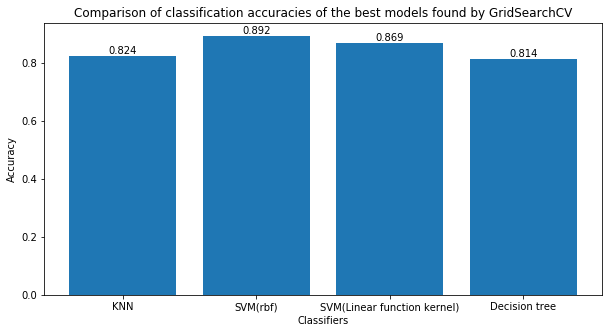

In [13]:
names = ['KNN','SVM(rbf)','SVM(Linear function kernel)','Decision tree']
values = [cv_acc_knn, cv_acc_rbf ,cv_acc_lin, cv_acc_dtc]

# creating the bar plot 
fig = plt.figure(figsize = (10, 5))
plt.bar(names, values)

for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(names[i],values[i]), ha='center', va='bottom')  
    
plt.xlabel("Classifiers") 
plt.ylabel("Accuracy") 
plt.title("Comparison of classification accuracies of the best models found by GridSearchCV") 

plt.show() 

<span style='font-family:"Times New Roman"'><font size="4">__Testing the best classification models on the validation data__
<hr>

In [14]:
#Prediction of the target values from the validation data in order to get to know what are the real accuracies of each method
y_predict_knn = knn.predict(X_valid)
y_predict_rbf = rbf.predict(X_valid)
y_predict_lin = lin.predict(X_valid)
y_predict_dtc = dtc.predict(X_valid)

In [15]:
#Classification accuracy evaluation
knn_acc = round(accuracy_score(y_valid, y_predict_knn),3)
rbf_acc = round(accuracy_score(y_valid, y_predict_rbf),3)
lin_acc = round(accuracy_score(y_valid, y_predict_lin),3)
dtc_acc = round(accuracy_score(y_valid, y_predict_dtc),3)

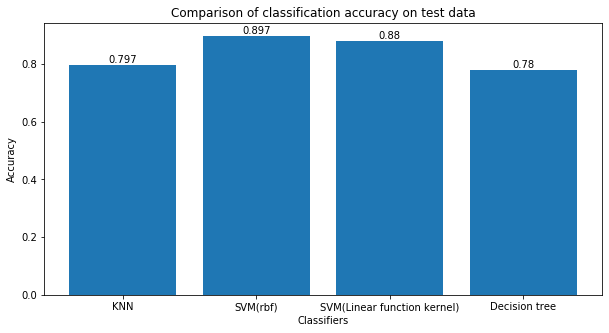

In [16]:
values = [knn_acc, rbf_acc, lin_acc, dtc_acc]

# creating the bar plot 
fig = plt.figure(figsize = (10, 5)) 
plt.bar(names, values) 
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(names[i],values[i]), ha='center', va='bottom')  
    
plt.xlabel("Classifiers") 
plt.ylabel("Accuracy") 
plt.title("Comparison of classification accuracy on test data") 

plt.show() 

In [17]:
print("<======Classification results========>")
print("K-nearest neighbours")
print(ConfusionMatrix(y_valid,y_predict_knn))
print(classification_report(y_valid,y_predict_knn))
print()
print("SVM classifier with a radial-basis kernel")
print(ConfusionMatrix(y_valid,y_predict_rbf))
print(classification_report(y_valid,y_predict_rbf))
print()
print("SVM classifier with a linear function kernel")
print(ConfusionMatrix(y_valid,y_predict_lin))
print(classification_report(y_valid,y_predict_lin))
print()
print("Decision tree classifier")
print(ConfusionMatrix(y_valid,y_predict_dtc))
print(classification_report(y_valid,y_predict_dtc))

<======Classification results========>
K-nearest neighbours
      |   F     |
      |   a   T |
      |   l   r |
      |   s   u |
      |   e   e |
------+---------+
False |<147> 25 |
 True |  36 <92>|
------+---------+
(row = reference; col = test)

              precision    recall  f1-score   support

       False       0.80      0.85      0.83       172
        True       0.79      0.72      0.75       128

    accuracy                           0.80       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.80      0.80       300


SVM classifier with a radial-basis kernel
      |   F     |
      |   a   T |
      |   l   r |
      |   s   u |
      |   e   e |
------+---------+
False |<155> 17 |
 True |  14<114>|
------+---------+
(row = reference; col = test)

              precision    recall  f1-score   support

       False       0.92      0.90      0.91       172
        True       0.87      0.89      0.88       128

    accuracy        

In [18]:
#Saving the built decision tree to the variable 
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data, feature_names=columns)

In [19]:
#Saving an image file from the built decision tree
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png("tree.tif")

In [20]:
f = Image.open("tree.tif").show()

<span style='font-family:"Times New Roman"'><font size="4">__b) Prediction on a hold-out test set.__</font></span><br>
<span style='font-family:"Times New Roman"'><font size="4"> An additional dataset, __CE802_P2_Test.csv__, is provided
inside the __CE802_P2_Data.zip__ archive. Binary outcomes are withheld for this test set (i.e. the
“Class” column is empty). In this second task you are required to produce class predictions of
the records in the test set using one approach of your choice among those tested in task “a” (for
example the one achieving the best performance). These data must not be used other than to test
the algorithm trained on the training data.
As part of your submission you should submit a new version of the file __CE802_P2_Test.csv__ in
CSV format with the missing class replaced with the output predictions obtained using the approach
chosen. This second task will be marked based on the prediction accuracy on the test set.</font></span><br><br>
<span style='font-family:"Times New Roman"'><font size="4">__Prediction of target values from the test dataset__
<hr>


In [21]:
#Performing prediction by the best models
y_predict_knn = knn.predict(X_test)
y_pred_test_lin = lin.predict(X_test)
y_pred_test_rbf=rbf.predict(X_test)
y_predict_test_dtc = dtc.predict(X_test)

In [22]:
df = pd.DataFrame({'Predicted #':range(0,len(y_predict_knn)),
                   'K-nearest neighbours':y_predict_knn,
                   'Support vector machine with linear function':y_pred_test_lin,
                   'Support Vector Machine with rbf':y_pred_test_rbf,
                   'Decision trees':y_predict_test_dtc})
df.set_index('Predicted #',inplace=True)
df.head(25) #Demonstration of the first 25 rows from the retrieved data

,K-nearest neighbours,Support vector machine with linear function,Support Vector Machine with rbf,Decision trees
Predicted #,,,,
0,False,True,True,False
1,True,False,True,True
2,True,True,True,True
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,True,True,True,True
8,True,True,True,True


In [23]:
#Replacing empty values from the Class column with the predicted values
for i in range(0,len(y_predict_knn)):
    test_data.loc[i,'Class']=y_pred_test_rbf[i]

In [24]:
test_data.head(25) #Demonstration of the first 25 rows from the obtained table

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,10.776347,True
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.640000,True
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.840000,True
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.130000,False
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,10.776347,False
5,-252.81,8.73,2,0.32,0.32,-7.20,5.19,-20.85,-26.14,-22.14,17,-35.87,1.80,12.08,9.530000,False
6,-252.81,8.01,2,0.64,2.64,-6.42,3.63,-21.18,-26.14,-26.02,6,-46.87,0.74,11.45,10.010000,False
7,-276.81,8.67,2,0.74,0.36,-9.08,1.32,-22.71,-24.14,-20.88,14,-24.87,1.83,8.94,12.230000,True
8,-225.81,11.70,2,0.06,1.30,-7.90,2.73,-22.29,-26.14,-20.84,2,-9.87,1.86,10.26,11.320000,True
9,-216.81,9.54,2,0.61,-0.42,-10.12,7.02,-23.07,-26.14,-21.86,13,-3.87,1.74,10.72,10.776347,True


In [25]:
#Saving the table
import pathlib
pathlib.Path('Results').mkdir(parents=True, exist_ok=True) 
test_data.to_csv(result_file, sep=',', index=False)

<span style='font-family:"Times New Roman"'><font size="4">__Building a correlation matrix using retrieved results__
<hr>

In [26]:
#Storing prediction results of each method in one dictionary to investigate similiarity of outcomes
results={"KNN":y_predict_knn,"SVM(Linear)":y_pred_test_lin, "SVM(rbf)":y_pred_test_rbf,"DT":y_predict_test_dtc}
df = pd.DataFrame(results,columns=results.keys())

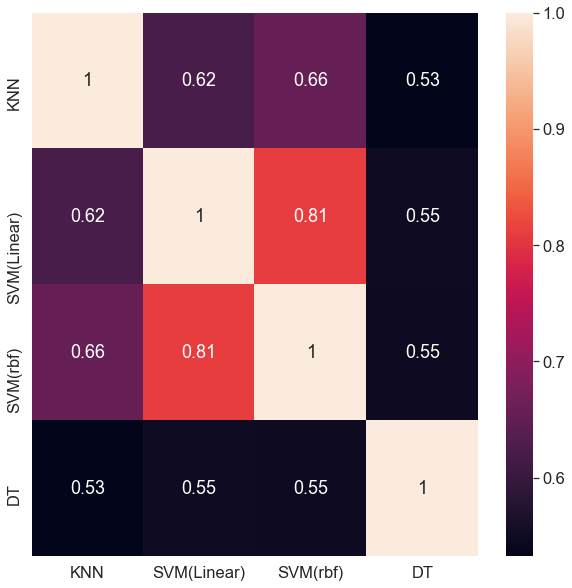

In [27]:
#Building a certain correlation matrix
corrMatrix = df.corr()
plt.figure(figsize=(10,10))
sn.set(font_scale=1.5)

sn.heatmap(corrMatrix, annot=True)
plt.show()

<span style='font-family:"Times New Roman"'><font size="4">__Explanation of the built correlation matrix__</font></span><br>
><span style='font-family:"Times New Roman"'><font size="4">As it can be seen from the correlation matrix above, outcomes from Support vector machines with rbf and with a linear function kernel have the biggest similiarity.</font></span>


In [28]:
corrMatrix

,KNN,SVM(Linear),SVM(rbf),DT
KNN,1.000000,0.622708,0.655245,0.532343
SVM(Linear),0.622708,1.000000,0.810538,0.550202
SVM(rbf),0.655245,0.810538,1.000000,0.547348
DT,0.532343,0.550202,0.547348,1.000000
